In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/CodSoft/Task_3/Iris_dataset.txt")
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])
label=label_encoder.classes_
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0


In [18]:
missing_values = df.isnull().sum()
print(missing_values)

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [19]:
from sklearn.model_selection import train_test_split, cross_val_score
X = df.drop(['species'], axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Create instances of classification models
svm_model = SVC()
random_forest_model = RandomForestClassifier()
gbm_model = GradientBoostingClassifier()

# Choose the number of folds (k) for cross-validation
k_folds = 5

# Perform k-fold cross-validation and get performance metrics
svm_scores = cross_val_score(svm_model, X, y, scoring='accuracy', cv=k_folds)
random_forest_scores = cross_val_score(random_forest_model, X, y, scoring='accuracy', cv=k_folds)
gbm_scores = cross_val_score(gbm_model, X, y, scoring='accuracy', cv=k_folds)

# Calculate mean accuracy for each model
mean_svm_score = svm_scores.mean()
mean_random_forest_score = random_forest_scores.mean()
mean_gbm_score = gbm_scores.mean()

print("Mean SVM Accuracy:", mean_svm_score)
print("Mean Random Forest Accuracy:", mean_random_forest_score)
print("Mean GBM Accuracy:", mean_gbm_score)

# Choose the best model based on the mean accuracy
best_accuracy = max(mean_svm_score, mean_random_forest_score, mean_gbm_score)

if best_accuracy == mean_svm_score:
    chosen_model = svm_model
elif best_accuracy == mean_random_forest_score:
    chosen_model = random_forest_model
else:
    chosen_model = gbm_model

print("Best Model is:", chosen_model)

# Fit the best model on the entire dataset
chosen_model.fit(X_train, y_train)

# Make predictions using the best model
predictions = chosen_model.predict(X_test)

Mean SVM Accuracy: 0.9666666666666666
Mean Random Forest Accuracy: 0.96
Mean GBM Accuracy: 0.9600000000000002
Best Model is: SVC()


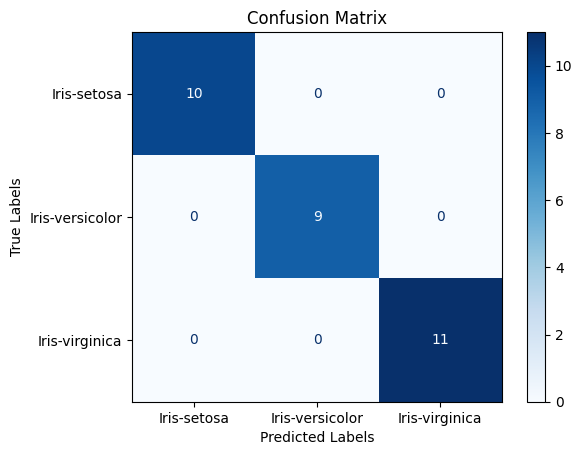

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Display the confusion matrix using matplotlib
classes = label  # Replace the class names as per your dataset
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()